# Investigating Titanic Database

* Dataset [https://www.udacity.com/api/nodes/5420148578/supplemental_media/titanic-datacsv/download]
* Data description [https://www.kaggle.com/c/titanic/data]

## 1) Introdution
<p>As we saw in the film directed by James Cameron that chronicles the Titanic's crash, women and children are a priority for a rescue. In this context, this study aims to analyze the database of ship's passengers and verify that the correlation between gender, age and survival. As an additional study, the correlation between income and passenger survival will be analyzed. It will be done from the information if the tickets bought were first, second or third class.</p>
The questions that will be answered:
* Did age and gender influence the passenger's survival?
* Did passenger's class influence survival?

## 2) Variables
* <b>Dependent: </b> Passenger's survival
* <b>Independent: </b> Passenger's gender, age and class

## 3) Analysis

### 3.1) Meeting the data

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline

titanic_file = 'titanic_data.csv'
titanic_data = pd.read_csv(titanic_file)

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3.1.1) Passengers by gender

In [5]:
print "Total passengers:", titanic_data['PassengerId'].count()
print "Genders:\n",titanic_data.groupby("Sex").size()


Total passengers: 891
Genders:
Sex
female    314
male      577
dtype: int64


#### 3.1.2) Age's Histogram

Mean age:  29.6991176471
Standard deviation:  14.5264973323


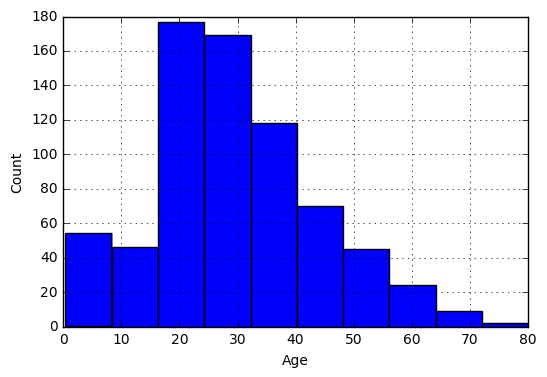

In [6]:
print "Mean age: ", titanic_data['Age'].mean()
print "Standard deviation: ", titanic_data['Age'].std()

titanic_data['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')


#### 3.1.3) Passengers by class

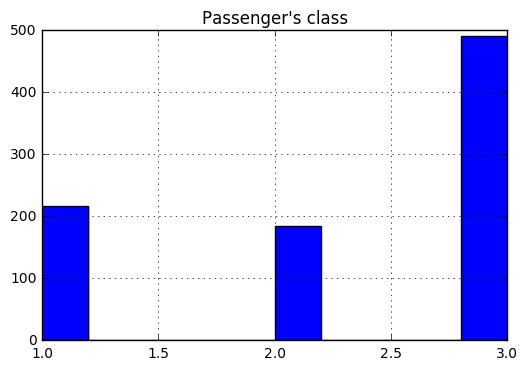

In [7]:
titanic_data["Pclass"].hist()
plt.title("Passenger's class")

### 3.2) Data Wrangling

#### 3.2.1) Checking Data

In [23]:
def is_data_ok(data):
    """
    From Titanic's test data, verify if chosen variables (Age, Pclass, Sex) show any problem like missing or suspicious data.
    Return: True if everything is OK, False if found any problem and the respective value
    """
    if data['Pclass'] not in (1,2,3):
        print "Invalid Pclass ",data['Pclass']
        return False
    if data['Sex'] not in ['male','female']:
        print "Invalid Sex ",data['Sex']
        return False
    if math.isnan(data['Age']) or data['Age'] < 0 or data['Age'] > 120:
        print "Invalid Age ",data['Age']
        return False
    return True


In [30]:
# Testing if everything looks fine

result = titanic_data.apply(is_data_ok,axis=1)
print result.all() # Prints True if everything is OK


True


#### 3.2.2) Filling missing ages
<p>Since we are using Age, Sex and Pclass data in our analysis and we want to fill failures in Ages, let's group ages by Sex and Pclass to fill with their mean.
Ex: When found a missing age, fill it with the group's mean it belongs according to his/her gender and Pclass.</p>

In [27]:
# Grouping missing ages by Pclass and sex
mean_ages =  titanic_data.groupby(['Sex','Pclass'])['Age'].mean()

print mean_ages


Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64


In [28]:
def fill_missing_ages(register):
    """
    When it found a missing age, use his Pclass and Sex to fill this age with the mean of the group.
    Return: mean of the group if age is missing; or the age found.
    """
    global mean_ages
    if math.isnan(register['Age']):
        return mean_ages[register['Sex']][register['Pclass']]
    return register['Age']

titanic_data['Age'] = titanic_data.apply(fill_missing_ages, axis=1)

In [29]:
# Exec the same test as before - should return True if everything is OK
result = titanic_data.apply(is_data_ok,axis=1)
print (result.all())


True


### 3.3) Classifying data


In [11]:
def classify(register):
    """
    Passengers were classified according their age/gender as: woman, man or children.
        man: sex = "male" and age > 15
        woman: sex = "female" and age > 15
        children: age <=15
        
    Parameter: a register with at less Age and Sex
    Return 1 if man, 2 if woman, 3 if children
    """
    
    if register['Sex'] == 'male' and register['Age'] > 15:
        return 1
    if register['Sex'] == 'female' and register['Age'] > 15:
        return 2
    return 3
    
titanic_data['GAclass'] = titanic_data.apply(classify, axis=1)

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,GAclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### 3.4) Calculating Correlations

Using Panda's correlation method, we can verify the correlation between two variables.

In [10]:
correlation = titanic_data.corr()

print "Correlation between age/gender and survival: ",correlation['Survived']['GAclass']
print "Correlation between cabin class and survival: ",correlation['Survived']['Pclass']

Correlation between age/gender and survival:  0.237636784427
Correlation between cabin class and survival:  -0.338481035961


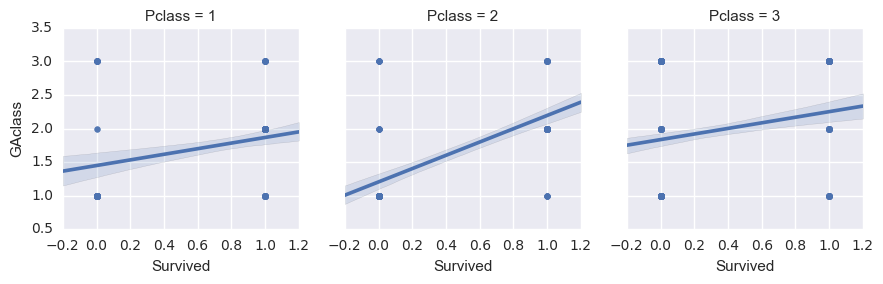

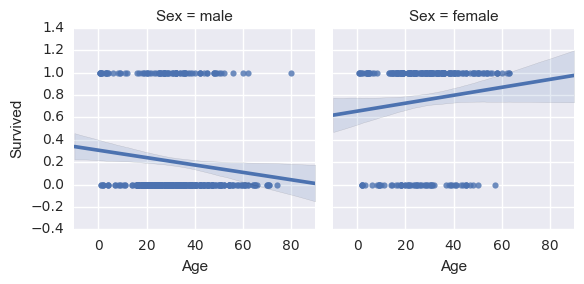

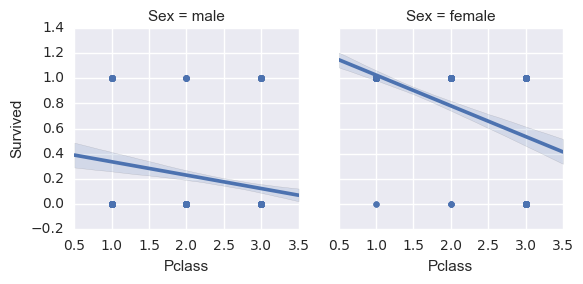

In [106]:
import seaborn as sns

g = sns.FacetGrid(titanic_data, col="Pclass")  
g.map(sns.regplot, "Survived", "GAclass")  

h = sns.FacetGrid(titanic_data, col="Sex")  
h.map(sns.regplot, "Age", "Survived")  

i = sns.FacetGrid(titanic_data, col="Sex")  
i.map(sns.regplot, "Pclass", "Survived")  



### 4) Conclusion

<p>Through this deep analysis of the data, we can conclude that there is a correlation between Survival and Class (gender/age). Pearson R 0.237636784427 value shows that women and children have a higher chance than men of surviving. The correlation between the economic situation of passengers and survival, the value -0.338481035961 shows that the poorer less chance of survival.
<p>Analyzing the resulting graphs the correlation between age/gender and survival is strongly confirmed, especially for passengers in the second and third classes.</p>
<p>Analyzing survival only by gender and age we see that: 1) males have a lower chance of survival on average, and smaller the older; 2) females have a very high chance of survival and the higher the age, higher the chance.</p>
<p>Finally, analyzing gender/class graphs we confirm that for both sexes isn't good to be poor in a naval accident.</p>

### 5) Lectures
* MatplotLib [http://matplotlib.org/users/pyplot_tutorial.html]
* Data Visualization in Python: Advanced Functionality in Seaborn [http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/]
* Pandas.Dataframe.corr [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html]